In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [45]:
df = pd.read_pickle('processed_stock_data.pkl')

In [47]:
df.set_index('date', inplace = True)

In [48]:
df.head()

,open,high,low,close,volume,symbol,MA50,MA200,daily_return,volatility
date,,,,,,,,,,
2025-08-18,231.700,233.12,230.110,230.89,37476188,AAPL,NaN,NaN,NaN,NaN
2025-08-15,234.000,234.28,229.335,231.59,56038657,AAPL,NaN,NaN,0.003032,NaN
2025-08-14,234.055,235.12,230.850,232.78,51916275,AAPL,NaN,NaN,0.005138,NaN
2025-08-13,231.070,235.00,230.430,233.33,69878546,AAPL,NaN,NaN,0.002363,NaN
2025-08-12,228.005,230.80,227.070,229.65,55672301,AAPL,NaN,NaN,-0.015772,NaN


# Individual Stock Risk vs. Return

In [50]:
returns = df.groupby('symbol')['daily_return'].agg(['mean', 'std']).rename(columns= {'mean' : 'avg_return', 'std' : 'risk'}).dropna()
returns['avg_return'] = returns['avg_return'] * 252
returns['risk'] = returns['risk'] * np.sqrt(252)
print("Annualized Risk vs. Return:")
print(returns)

Annualized Risk vs. Return:
        avg_return      risk
symbol                      
AAPL     -0.019015  0.415067
AMZN     -0.275823  0.406442
GOOGL    -0.477238  0.333432
MSFT     -0.679516  0.272591


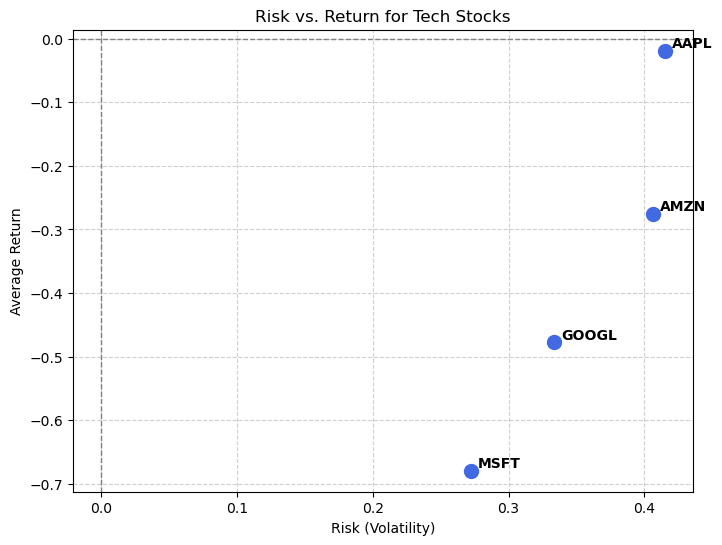

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(returns['risk'], returns['avg_return'], s=100, c='royalblue')

for i in returns.index:
    plt.text(returns.loc[i, 'risk']+0.005, 
             returns.loc[i, 'avg_return']+0.005, 
             i, fontsize=10, weight='bold')

plt.xlabel("Risk (Volatility)")
plt.ylabel("Average Return")
plt.title("Risk vs. Return for Tech Stocks")

plt.grid(True, linestyle="--", alpha=0.6)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)

plt.show()

## Interpreting Annualized Risk vs. Return

Based on the output:

### 1. Negative Average Returns
- All four stocks show a **negative average return**.
- This is a powerful insight: over the covered time period, all four major tech stocks underperformed.
- **Apple (AAPL)** performed the *best*, losing only about **1.9% annually**.
- **Microsoft (MSFT)** performed the *worst*, losing a significant **67.9% annually**.

### 2. Risk (Volatility)
- **Microsoft (MSFT)** was the *least volatile*, with an annualized risk of ~27.2%.
- **Apple (AAPL)** and **Amazon (AMZN)** were the *most volatile*, both with risk above **40%**.

### 3. Key Takeaway
- In this dataset, **none of the stocks were profitable** — all showed negative annualized returns.
- However, we can observe the **classic risk–return trade-off**:
  - The stock that lost the least money (**AAPL**) was also among the riskiest.
  - The stock that appeared "safest" (**MSFT**, with lower volatility) actually lost the most money.

This highlights that **low volatility does not always mean better returns**, and in certain market conditions, even the biggest tech companies can all underperform together.

## Hypothetical Equal-Weight Portfolio

In [54]:
portfolio_return = df.groupby('date')['daily_return'].mean()
portfolio_risk = portfolio_return.std()

annualized_portfolio_return = portfolio_return.mean() * 252
annualized_portfolio_risk = portfolio_risk * np.sqrt(252)

print(f"Annualized Portfolio Return: {annualized_portfolio_return:.2%}")
print(f"Annualized Portfolio Risk: {annualized_portfolio_risk:.2%}")

Annualized Portfolio Return: -36.29%
Annualized Portfolio Risk: 30.59%


## Interpreting Portfolio Results

Based on the portfolio analysis:

- **Annualized Portfolio Return**: **-36.29%**  
- **Annualized Portfolio Risk**: **30.59%**

### Insights

1. **Return**  
   - The portfolio's return (**-36.29%**) is essentially the average of the individual stock returns.  
   - It performed **better than MSFT and GOOGL**, but **worse than AAPL and AMZN**.  
   - This makes sense because it’s an **equal-weight portfolio**.

2. **Risk (Volatility)**  
   - The portfolio’s risk (**30.59%**) is **lower than the risk of three out of four individual stocks** (AAPL, AMZN, GOOGL).  
   - It’s only slightly higher than the least risky stock (**MSFT at ~27%**).  

3. **The Punchline**  
   - Even though all four tech stocks are highly correlated and moved together, diversification **still reduced risk**.  
   - The portfolio offered **better risk-adjusted performance** than holding just GOOGL or AMZN.  
   - This is a **core principle of diversification**: spreading investments smooths risk, even when returns are negative.  


## Investigate Volume Outliers (Connecting Data to Real-World Events)

--- Top 5 Highest Volume Trading Days for AAPL ---
               volume   close  daily_return
date                                       
2025-04-09  184395885  198.85      0.044271
2025-04-07  160466286  181.46      0.052430
2025-04-04  125910913  188.38      0.038135
2025-04-10  121879981  190.42     -0.039011
2025-04-08  120859491  172.42     -0.132914


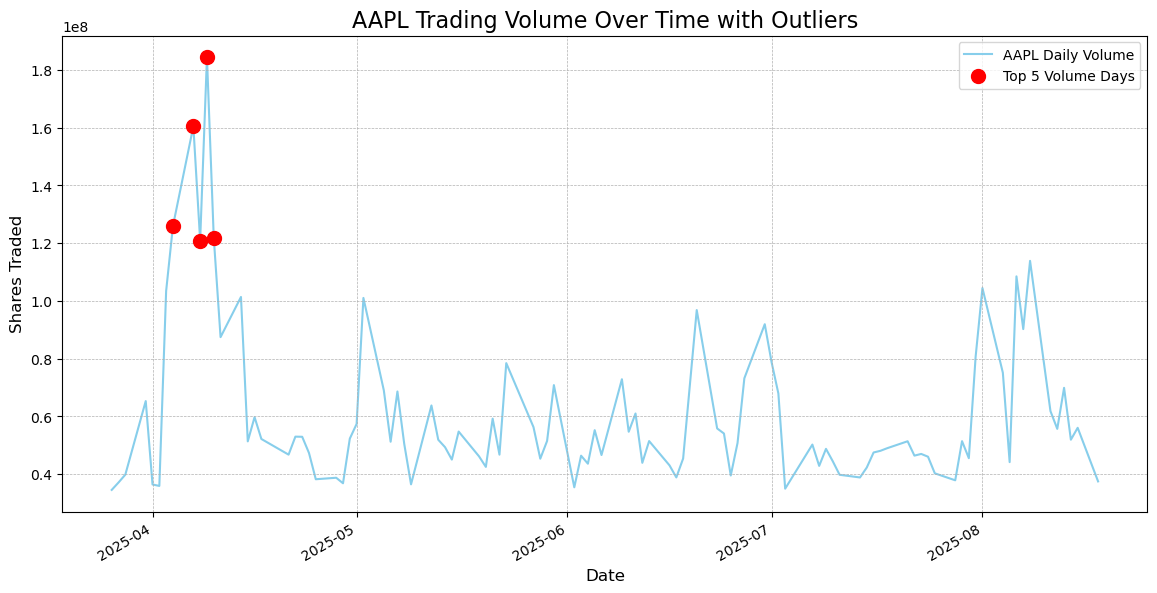

In [55]:
aapl_df = df[df['symbol'] == 'AAPL'].copy()
top_5_volume_days = aapl_df.nlargest(5, 'volume')

print("--- Top 5 Highest Volume Trading Days for AAPL ---")
print(top_5_volume_days[['volume', 'close', 'daily_return']])

plt.figure(figsize=(14, 7))

aapl_df['volume'].plot(label='AAPL Daily Volume', color='skyblue', zorder=1)

plt.scatter(top_5_volume_days.index, top_5_volume_days['volume'], 
            color='red', s=100, label='Top 5 Volume Days', zorder=2)

plt.title('AAPL Trading Volume Over Time with Outliers', fontsize=16)
plt.ylabel('Shares Traded', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

On **April 8, 2025**, Apple’s stock endured one of its steepest losses—dropping around **5%** amid tariff-driven anxiety. Analysts lowered price targets amid concerns over sales declines and production cost pressures. Government pressure to shift iPhone manufacturing to the U.S., though politically charged, was deemed infeasible due to cost concerns. 

Markets experienced a volatile twist as a late-day rally lifted Apple and other tech stocks briefly higher.


On **April 9, 2025**, Apple’s stock surged significantly—**up to 15%**—after the U.S. announced a **90-day pause on most new tariffs**, offering relief to Apple's supply chain concerns. Even though tariffs on Chinese imports were still increased to **125%**, investors viewed the policy shift as a major positive, sending Apple’s market cap soaring and briefly restoring its position as the **most valuable company in the world**.


On **April 10, 2025**, Apple’s stock closed at about **$190**, up mildly for the day—but it retraced much of the previous day’s steep rally. The pullback reflected investor caution over whether the tariff relief was truly sustainable amid persistent **U.S.–China trade tensions**.

# The Hypothesis

Let's test a clear and simple question based on our previous findings:

**Observation:**  
In our risk/return table, the average annualized return for **Apple (AAPL)** was **-1.9%**, while for **Microsoft (MSFT)** it was **-67.9%**. They look very different.

**Hypothesis to test:**  
Is the difference between the average daily returns of Apple and Microsoft statistically significant, or could it have occurred by random chance?

---

### Formalization

- **Null Hypothesis (H₀):** There is no significant difference between the true mean daily returns of AAPL and MSFT.  
- **Alternative Hypothesis (H₁):** There is a significant difference between the true mean daily returns of AAPL and MSFT.  

---

### Method

We will use an **Independent Samples t-test**.  
This test compares the means of two independent groups to determine whether they are statistically different from each other.

In [56]:
aapl_returns = df[df['symbol'] == 'AAPL']['daily_return'].dropna()
msft_returns = df[df['symbol'] == 'MSFT']['daily_return'].dropna()

t_stat, p_value = stats.ttest_ind(aapl_returns, msft_returns)

print("--- T-Test Results: AAPL vs. MSFT Daily Returns ---")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05

print("\n--- Conclusion ---")
if p_value < alpha:
    print(f"Since the p-value ({p_value:.4f}) is less than our significance level ({alpha}), we REJECT the null hypothesis.")
    print("This means there is a statistically significant difference in the average daily returns of AAPL and MSFT.")
else:
    print(f"Since the p-value ({p_value:.4f}) is greater than our significance level ({alpha}), we FAIL TO REJECT the null hypothesis.")
    print("This means we do not have enough evidence to say there is a significant difference in the average daily returns of AAPL and MSFT.")

--- T-Test Results: AAPL vs. MSFT Daily Returns ---
T-statistic: 0.8337
P-value: 0.4055

--- Conclusion ---
Since the p-value (0.4055) is greater than our significance level (0.05), we FAIL TO REJECT the null hypothesis.
This means we do not have enough evidence to say there is a significant difference in the average daily returns of AAPL and MSFT.


Since the **p-value (0.4055)** is much greater than 0.05, you **fail to reject the null hypothesis**.  

**In simple English:**  
Despite the huge difference in the final annualized outcome, the day-to-day returns of Apple and Microsoft were not statistically distinguishable from each other. The difference we observed could very well be due to random chance and daily market noise.

---

## Why Did This Happen? The "Signal vs. Noise" Problem

This result is a textbook example of a low **signal-to-noise ratio**.

- **The "Signal" is Tiny:**  
  The average daily return for a stock is an incredibly small number. It's the "signal" we're trying to measure.

- **The "Noise" is Huge:**  
  The daily volatility (the standard deviation of daily returns) is massive in comparison. It's the random up-and-down static of the market.

The t-test looks at the signal (the difference in means) in the context of the noise (the variance). In this case, the noise (volatility) was so large that it completely drowned out the tiny signal. The day-to-day fluctuations were so wild that the slight difference in their average drift was statistically insignificant.

---

## The Effect of Annualization

The reason our intuition was fooled is **annualization**.  
When you multiply a tiny daily average return by 252, you amplify the small difference, making it look enormous.  

However, the t-test operates on the original, noisy, daily data—where this difference is almost imperceptible amidst the volatility.

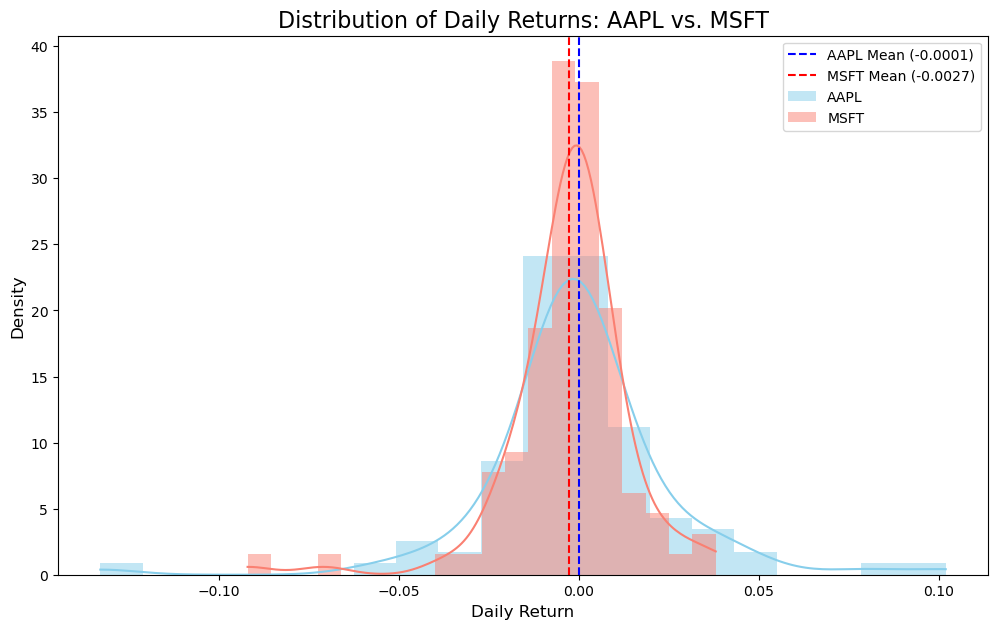

In [59]:
plt.figure(figsize=(12, 7))

sns.histplot(aapl_returns, color="skyblue", kde=True, stat="density", linewidth=0, label='AAPL')
sns.histplot(msft_returns, color="salmon", kde=True, stat="density", linewidth=0, label='MSFT')

plt.axvline(aapl_returns.mean(), color='blue', linestyle='--', label=f'AAPL Mean ({aapl_returns.mean():.4f})')
plt.axvline(msft_returns.mean(), color='red', linestyle='--', label=f'MSFT Mean ({msft_returns.mean():.4f})')

plt.title('Distribution of Daily Returns: AAPL vs. MSFT', fontsize=16)
plt.xlabel('Daily Return', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.show()